In [1]:
import numpy as np
import os
import pandas as pd
import skfda
import matplotlib.pyplot as plt
from skfda.exploratory.visualization import Boxplot
from skfda.inference.anova import oneway_anova
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from scipy import integrate, stats
from scipy.stats import wilcoxon, f_oneway, normaltest, kruskal

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

In [2]:
home_path = os.path.abspath(os.getcwd())

#definizione della basis e lambda
basis = skfda.representation.basis.BSpline(n_basis=18)
smoother=skfda.preprocessing.smoothing.BasisSmoother(basis, smoothing_parameter=1e-5)

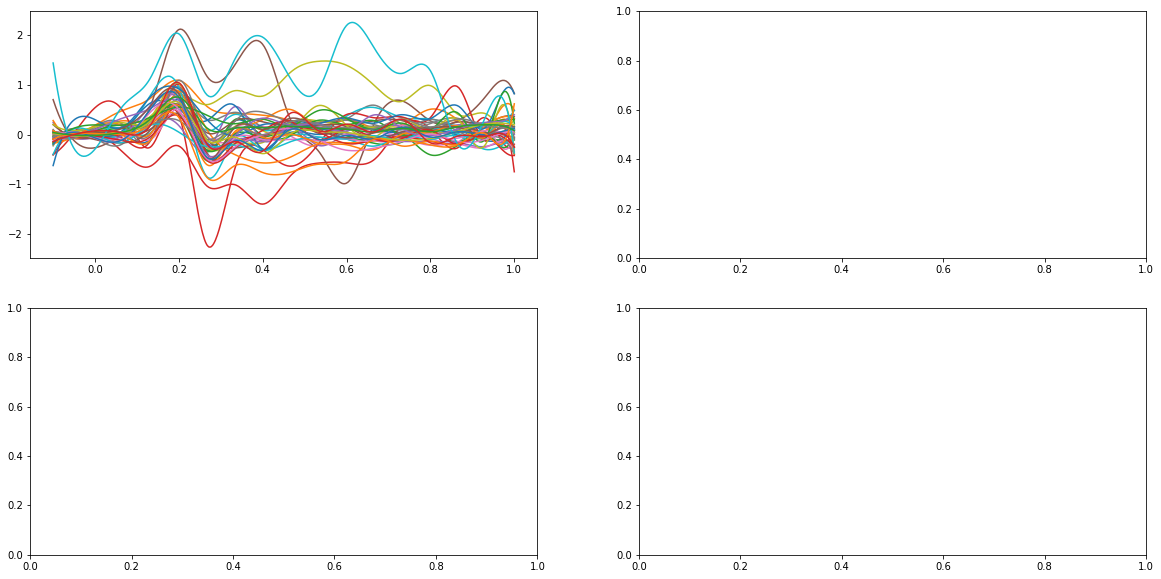

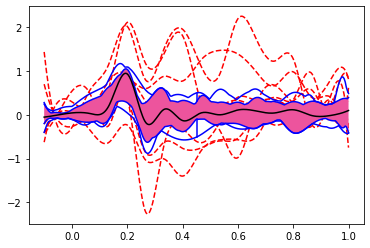

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

df=pd.read_csv(home_path + '\\final_signals\\animal_avg_occipital.csv')
data_animals=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_animals.T, grid_points=times)
animal_basis = smoother.fit_transform(datagrid)
animal_basis.plot(axes[0,0])

fdBoxplot = Boxplot(animal_basis.to_grid())
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()

plt.show()